<a href="https://colab.research.google.com/github/hinazain28/Sentimental-Analysis/blob/main/Sentiment_analysis_of_daraz_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install google-play-scraper nltk pandas matplotlib seaborn


In [28]:
from google_play_scraper import Sort, reviews
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
result, _ = reviews(
    'com.daraz.android',  # ✅ Daraz app package name
    lang='en',            # English only (you can try 'ur' for Urdu later)
    country='pk',         # Pakistan
    sort=Sort.NEWEST,     # Get most recent reviews
    count=200             # Number of reviews to fetch
)

# Create DataFrame from results
df = pd.DataFrame(result)
df = df[['content', 'score']]  # Keep only review text and rating
df.columns = ['Review', 'Rating']  # Rename columns
df.head()


,Review,Rating
0,average,1
1,awesomeness,5
2,daraz is beast but we need drop shipping daraz...,4
3,Good,5
4,currently there is no way to delete photo if y...,1


In [30]:
# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define sentiment classifier
def get_sentiment(text):
    score = sid.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply it to each review
df['Sentiment'] = df['Review'].apply(get_sentiment)
df[['Review', 'Rating', 'Sentiment']].head()


,Review,Rating,Sentiment
0,average,1,Neutral
1,awesomeness,5,Neutral
2,daraz is beast but we need drop shipping daraz...,4,Negative
3,Good,5,Positive
4,currently there is no way to delete photo if y...,1,Negative


/tmp/ipython-input-31-4237809819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


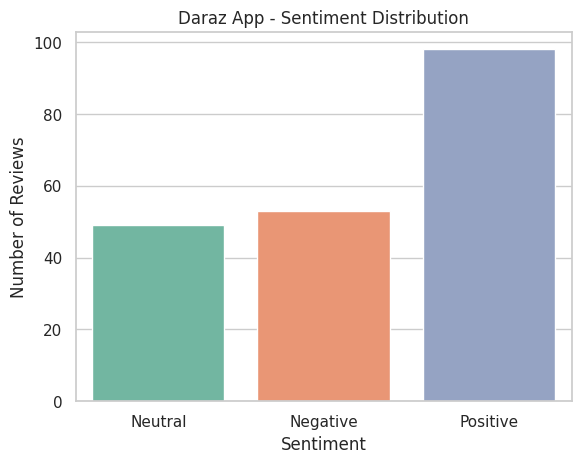

In [31]:
sns.set(style="whitegrid")
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title('Daraz App - Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


**Insights:**

*After analyzing 200 reviews of the Daraz app from the Google Play Store, most reviews were classified as [Positive / Negative / Neutral]. Common complaints included late delivery, app glitches, and poor customer service, while many users appreciated discounts and fast shipping. These insights can help Daraz focus on improving delivery time and app performance to enhance customer
satisfaction.*